In [9]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import ast
import numpy as np
import altair as alt
import re
import pickle as pkl
import matplotlib


In [10]:
# load mind articled_mind.pkl
with open("../data/ebnerd/articles_ebnerd.pickle", "rb") as f:
    articles = pkl.load(f)

In [11]:
display(articles.head())
print(articles.columns)
print(articles.text)
# print unqique number of story
print(f"Number of unique stories: {articles['story_sim_10'].nunique()}")
# and now of story_sim_70
print(f"Number of unique story_sim_70: {articles['story_sim_50'].nunique()}")
print(articles['topics'])

article_id                             title  \
0     3001353      Natascha var ikke den første   
1     3003065         Kun Star Wars tjente mere   
2     3012771  Morten Bruun fyret i SønderjyskE   
3     3023463         Luderne flytter på landet   
4     3032577    Cybersex: Hvornår er man utro?   

                                            subtitle  last_modified_time  \
0  Politiet frygter nu, at Nataschas bortfører ha... 2023-06-29 06:20:33   
1  Biografgængerne strømmer ind for at se 'Da Vin... 2023-06-29 06:20:35   
2  FODBOLD: Morten Bruun fyret med øjeblikkelig v... 2023-06-29 06:20:39   
3  I landets tyndest befolkede områder skyder bor... 2023-06-29 06:20:43   
4  En flirtende sms til den flotte fyr i regnskab... 2023-06-29 06:20:46   

   premium                                               body  \
0    False  Sagen om den østriske Natascha og hendes bortf...   
1    False  Vatikanet har opfordret til at boykotte filmen...   
2    False  Kemien mellem spillerne i Superligaklubben Søn...   
3    False  Det frække erhverv rykker på landet. I den tyn...   
4    False  De fleste af os mener, at et tungekys er utros...   

       published_time  image_ids     article_type  \
0 2006-08-31 08:06:45  [3150850]  article_default   
1 2006-05-21 16:57:00  [3006712]  article_default   
2 2006-05-01 14:28:40  [3177953]  article_default   
3 2007-03-24 08:27:59  [3184029]  article_default   
4 2007-01-18 10:30:37  [3030463]  article_default   

                                                 url  ...  \
0   https://ekstrabladet.dk/krimi/article3001353.ece  ...   
1  https://ekstrabladet.dk/underholdning/filmogtv...  ...   
2  https://ekstrabladet.dk/sport/fodbold/dansk_fo...  ...   
3  https://ekstrabladet.dk/nyheder/samfund/articl...  ...   
4  https://ekstrabladet.dk/sex_og_samliv/article3...  ...   

  complexity_readability complexity   story_topics  story_dataset  \
0              53.324009  53.324009   Kriminalitet   Kriminalitet   
1              45.541872  45.541872  Underholdning  Underholdning   
2              51.369484  51.369484        Erhverv        Erhverv   
3              41.733374  41.733374       Livsstil       Livsstil   
4              37.200783  37.200783       Livsstil       Livsstil   

  story_sim_10 story_sim_20  story_sim_30  story_sim_40  story_sim_50  story  
0            0            0             0             0             0      0  
1            1            1             1             1             1      1  
2            2            2             2             2             2      2  
3            3            3             3             3             3      3  
4            4            4             4             4             4      4  

[5 rows x 45 columns]

Index(['article_id', 'title', 'subtitle', 'last_modified_time', 'premium',
       'body', 'published_time', 'image_ids', 'article_type', 'url',
       'ner_clusters', 'entity_groups', 'topics', 'category', 'subcategory',
       'category_str', 'total_inviews', 'total_pageviews', 'total_read_time',
       'sentiment_score', 'sentiment_label', 'abstract', 'text_title',
       'text_subtitle', 'text_abstract', 'text_title_abstract', 'text_body',
       'text', 'publication_datetime', 'sentiment_metadata',
       'sentiment_dataset', 'sentiment_lexicon', 'sentiment_transformer',
       'complexity_lix', 'complexity_mtld', 'complexity_readability',
       'complexity', 'story_topics', 'story_dataset', 'story_sim_10',
       'story_sim_20', 'story_sim_30', 'story_sim_40', 'story_sim_50',
       'story'],
      dtype='object')
0        Natascha var ikke den første Politiet frygter ...
1        Kun Star Wars tjente mere Biografgængerne strø...
2        Morten Bruun fyret i SønderjyskE FODBOLD:

In [12]:
with open("../results/ebnerd_results_k@10.pkl", "rb") as f:
    results = pkl.load(f)

results_mean = results.map(
    lambda x: np.mean(x) if isinstance(x, (list, np.ndarray)) and len(x) > 0 else np.nan
)

display(results_mean)

/var/folders/f6/ggzrtr6d13l0g85_pyz_1zhm0000gp/T/ipykernel_78495/3046351921.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_mean = results.applymap(


topic_calibration  subtopic_calibration  complexity_calibration  \
pop              0.602471              0.704353                0.460443   
random           0.581324              0.700846                0.456144   
npa              0.571786              0.709541                0.464527   
nrms             0.565267              0.707643                0.463501   
lstur            0.528429              0.676338                0.465740   
naml             0.527624              0.676531                0.462935   

        fragmentation  activation  representation  alternative_voices  \
pop          0.724638    0.222395             NaN                 NaN   
random       0.711935    0.218964             NaN                 NaN   
npa          0.733503    0.216543             NaN                 NaN   
nrms         0.723387    0.219210             NaN                 NaN   
lstur        0.705514    0.214777             NaN                 NaN   
naml         0.742480    0.218542             NaN                 NaN   

        tf_idf_ild  sentbert_ild      gini  ndcg_values  
pop       0.982389      0.515594  0.240083     0.388342  
random    0.982832      0.516114  0.235073     0.450947  
npa       0.983167      0.515776  0.242002     0.485247  
nrms      0.983143      0.516090  0.240860     0.488158  
lstur     0.983088      0.516401  0.242421     0.486936  
naml      0.983128      0.515204  0.242998     0.495574

/var/folders/f6/ggzrtr6d13l0g85_pyz_1zhm0000gp/T/ipykernel_21746/4275610083.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('tab10', len(ordered_recommenders))


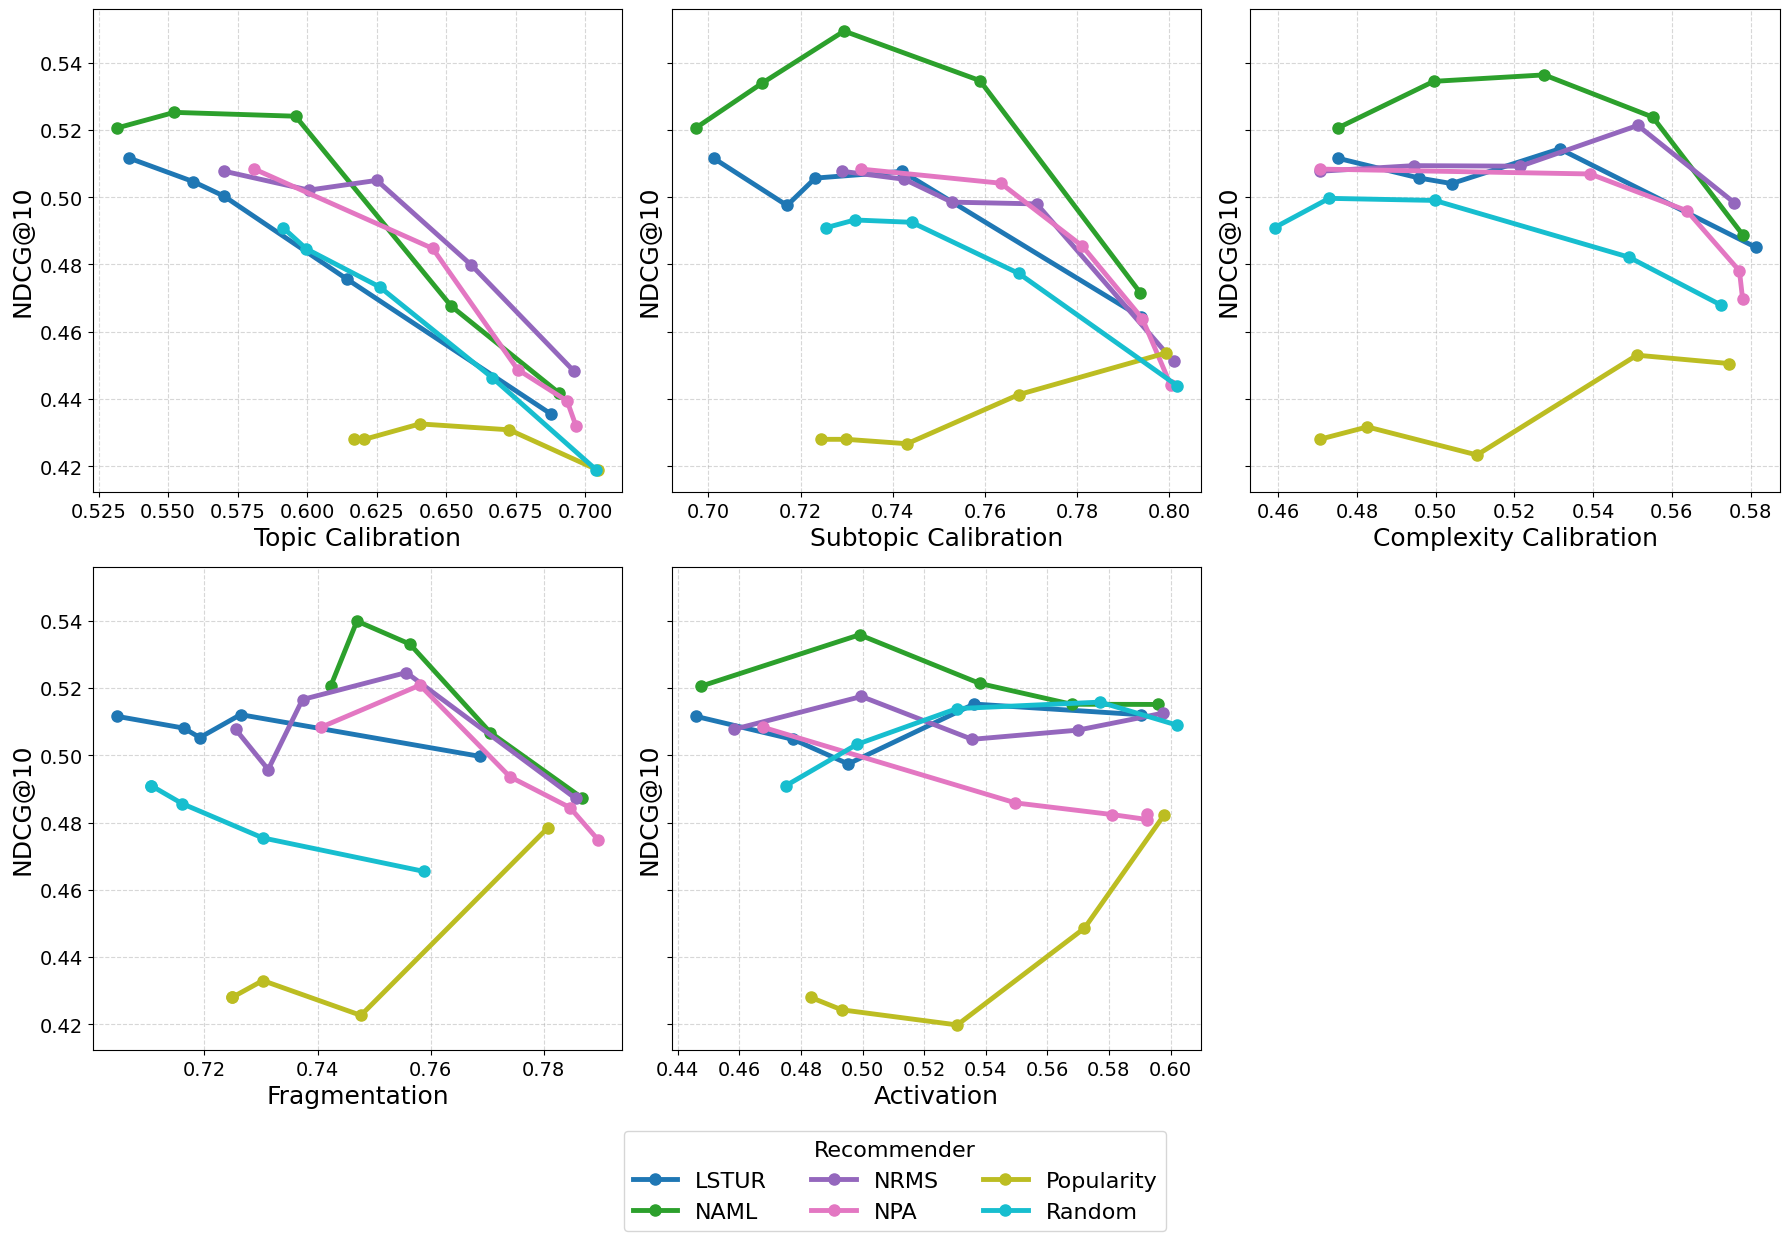

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

legend_name_map = {
    'pop': 'Popularity',
    'random': 'Random',
    'npa': 'NPA',
    'nrms': 'NRMS',
    'lstur': 'LSTUR',
    'naml': 'NAML',
}
ordered_recommenders = ['lstur', 'naml', 'nrms', 'npa', 'pop', 'random']
metric_specs = [
    {'label': 'Topic Calibration', 'x_label': 'Topic Calibration', 'path': Path('../results/ebnerd_topic_tradeoff_k@10.csv')},
    {'label': 'Subtopic Calibration', 'x_label': 'Subtopic Calibration', 'path': Path('../results/ebnerd_subtopic_tradeoff_k@10.csv')},
    {'label': 'Complexity Calibration', 'x_label': 'Complexity Calibration', 'path': Path('../results/ebnerd_complexity_tradeoff_k@10.csv')},
    {'label': 'Fragmentation', 'x_label': 'Fragmentation', 'path': Path('../results/ebnerd_fragmentation_tradeoff_k@10.csv')},
    {'label': 'Activation', 'x_label': 'Activation', 'path': Path('../results/ebnerd_activation_tradeoff_k@10.csv')},
]

palette = matplotlib.colormaps['tab10']
color_map = {rec: palette(i) for i, rec in enumerate(ordered_recommenders)}

fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()
legend_handles = {}

for ax, spec in zip(axes, metric_specs):
    tradeoff_df = pd.read_csv(spec['path'])
    tradeoff_df = tradeoff_df.dropna(subset=['ndcg', 'divergence'])
    tradeoff_df = tradeoff_df.sort_values(['recommender', 'lambda'])
    plot_df = tradeoff_df[tradeoff_df['recommender'] != 'incorrect_random']

    for rec in ordered_recommenders:
        group = plot_df[plot_df['recommender'] == rec]
        if group.empty:
            continue
        display_name = legend_name_map.get(rec, rec)

        # Add a tiny jitter when multiple lambdas land on the exact same point (shift right only)
        jittered = group.copy()
        seen_coords = {}
        jitter_step = 2.5e-3
        jitter_margin = 1e-2
        for idx, row in jittered.iterrows():
            key = (
                round(row['divergence'] / jitter_margin),
                round(row['ndcg'] / jitter_margin),
            )
            offset = seen_coords.get(key, 0)
            if offset:
                jittered.at[idx, 'divergence'] = row['divergence'] + jitter_step * offset
            seen_coords[key] = offset + 1

        line, = ax.plot(
            jittered['divergence'],
            jittered['ndcg'],
            linewidth=3.5,
            marker='o',
            markersize=8,
            color=color_map[rec],
            label=display_name,
        )
        legend_handles[display_name] = line

        # Label each point with its lambda value
        for x, y, lam in zip(jittered['divergence'], jittered['ndcg'], jittered['lambda']):
            ax.annotate(
                f"{lam}",
                (x, y),
                textcoords="offset points",
                xytext=(5, 4),
                ha="left",
                va="center",
                fontsize=9,
                color=color_map[rec],
                alpha=0.8,
            )

    ax.set_xlabel(spec['x_label'], fontsize=18)
    ax.set_ylabel('NDCG@10', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)

for ax in axes[len(metric_specs):]:
    ax.axis('off')

fig.legend(
    legend_handles.values(),
    legend_handles.keys(),
    loc='lower center',
    ncol=3,
    fontsize=16,
    title='Recommender',
    title_fontsize=16,
    bbox_to_anchor=(0.5, -0.04),
)
plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.subplots_adjust(bottom=0.12)
plt.show()




In [31]:
alt.data_transformers.enable("vegafusion")

df_naml   = pd.DataFrame({'value': results['topic_calibration']['naml'], 'type': 'NAML'})
df_nrms   = pd.DataFrame({'value': results['topic_calibration']['nrms'], 'type': 'NRMS'})
df_lstur  = pd.DataFrame({'value': results['topic_calibration']['lstur'], 'type': 'LSTUR'})
df_random = pd.DataFrame({'value': results['topic_calibration']['random'], 'type': 'Random'})
# df_original_random = pd.DataFrame({'value': results['topic_calibration']['incorrect_random'], 'type': 'Original Random'})
df_all    = pd.concat([df_naml, df_nrms, df_lstur, df_random])

sample = (
    df_all
    .groupby('type', group_keys=False)
    .apply(lambda d: (
        d.sample(5, random_state=1)
         .assign(sample_id=lambda df: np.arange(len(df)))
    ))
    .reset_index(drop=True)
)

density = alt.Chart(df_all).transform_density(
    'value',
    as_=['value','density'],
    groupby=['type'],
    extent=[df_all.value.min(), df_all.value.max()],
    bandwidth=(df_all.value.max() - df_all.value.min())/20
).mark_area(opacity=0.3).encode(
    x=alt.X('value:Q', title='Topic Calibration Score'),
    y=alt.Y('density:Q', title='Probability Density', stack=None),
    color=alt.Color(
        'type:N',
        title='Method',
        scale=alt.Scale(domain=['NAML', 'NRMS', 'LSTUR', 'Random', 'Original Random']),
        legend=alt.Legend(
            titleFontSize=16,
            labelFontSize=14,
            symbolSize=150,
            padding=10,
            orient='right',
            direction='vertical',
            # tweak these to nudge the legend into the plot
            legendX=20,
            legendY=20,
            fillColor='white',
            symbolOpacity=1,
        )
    )
)

# sample-point layer
sample_points = alt.Chart(sample).mark_point(
    filled=True,
    size=100,
    opacity=1
).encode(
    x='value:Q',
    y=alt.Y('type:N', 
            title=None, 
            axis=None, 
            sort=['NAML','NRMS','LSTUR','Random'],
            scale=alt.Scale(padding=40)  # Add padding to lower the Y values
           ),
    shape=alt.Shape(
        'sample_id:O',
        scale=alt.Scale(domain=list(range(5)), range=['circle','square','triangle','diamond','cross']),
        legend=None
    ),
    color=alt.Color('type:N', legend=None)
)

# combine + axis + title styling
chart = (density + sample_points).properties(
    width=600, height=300
).configure_title(
    fontSize=20,
).configure_axis(
    titleFontSize=16,
    labelFontSize=14
)

# Save with higher resolution (scale factor increases the resolution)
# chart.save('../results/ebnerd_topic_calibration_distributions.png', scale_factor=3.0)
chart

/var/folders/f6/ggzrtr6d13l0g85_pyz_1zhm0000gp/T/ipykernel_53789/667003044.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: (


alt.LayerChart(...)

In [23]:
alt.data_transformers.enable("vegafusion")

df_naml   = pd.DataFrame({'value': results['subtopic_calibration']['naml'], 'type': 'NAML'})
df_nrms   = pd.DataFrame({'value': results['subtopic_calibration']['nrms'], 'type': 'NRMS'})
df_lstur  = pd.DataFrame({'value': results['subtopic_calibration']['lstur'], 'type': 'LSTUR'})
df_random = pd.DataFrame({'value': results['subtopic_calibration']['random'], 'type': 'Random'})
df_pop = pd.DataFrame({'value': results['subtopic_calibration']['pop'], 'type': 'Pop'})
# df_original_random = pd.DataFrame({'value': results['subtopic_calibration']['incorrect_random'], 'type': 'Original Random'})
df_all    = pd.concat([df_naml, df_nrms, df_lstur, df_random, df_pop])

sample = (
    df_all
    .groupby('type', group_keys=False)
    .apply(lambda d: (
        d.sample(5, random_state=1)
         .assign(sample_id=lambda df: np.arange(len(df)))
    ))
    .reset_index(drop=True)
)

density = alt.Chart(df_all).transform_density(
    'value',
    as_=['value','density'],
    groupby=['type'],
    extent=[df_all.value.min(), df_all.value.max()],
    bandwidth=(df_all.value.max() - df_all.value.min())/20
).mark_area(opacity=0.3).encode(
    x=alt.X('value:Q', title='Subtopic Calibration Score'),
    y=alt.Y('density:Q', title='Probability Density', stack=None),
    color=alt.Color(
        'type:N',
        title='Method',
        scale=alt.Scale(domain=['NAML', 'NRMS', 'LSTUR', 'Random', 'Pop']),
        legend=alt.Legend(
            titleFontSize=16,
            labelFontSize=14,
            symbolSize=150,
            padding=10,
            orient='right',
            direction='vertical',
            # tweak these to nudge the legend into the plot
            legendX=20,
            legendY=20,
            fillColor='white',
            symbolOpacity=1,
        )
    )
)

# sample-point layer
sample_points = alt.Chart(sample).mark_point(
    filled=True,
    size=100,
    opacity=1
).encode(
    x='value:Q',
    y=alt.Y('type:N', 
            title=None, 
            axis=None, 
            sort=['NAML','NRMS','LSTUR','Random','Pop'],
            scale=alt.Scale(padding=40)  # Add padding to lower the Y values
           ),
    shape=alt.Shape(
        'sample_id:O',
        scale=alt.Scale(domain=list(range(5)), range=['circle','square','triangle','diamond','cross']),
        legend=None
    ),
    color=alt.Color('type:N', legend=None)
)

# combine + axis + title styling
chart = (density + sample_points).properties(
    width=600, height=300
).configure_title(
    fontSize=20,
).configure_axis(
    titleFontSize=16,
    labelFontSize=14
)

# Save with higher resolution (scale factor increases the resolution)
# chart.save('../results/ebnerd_topic_subcalibration_distributions.png', scale_factor=3.0)
chart

/var/folders/f6/ggzrtr6d13l0g85_pyz_1zhm0000gp/T/ipykernel_53789/2501297091.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: (


alt.LayerChart(...)

In [24]:
alt.data_transformers.enable("vegafusion")

df_naml   = pd.DataFrame({'value': results['activation']['naml'], 'type': 'NAML'})
df_nrms   = pd.DataFrame({'value': results['activation']['nrms'], 'type': 'NRMS'})
df_lstur  = pd.DataFrame({'value': results['activation']['lstur'], 'type': 'LSTUR'})
df_random = pd.DataFrame({'value': results['activation']['random'], 'type': 'Random'})
df_original_random = pd.DataFrame({'value': results['activation']['incorrect_random'], 'type': 'Original Random'})
df_all    = pd.concat([df_naml, df_nrms, df_lstur, df_random, df_original_random])

sample = (
    df_all
    .groupby('type', group_keys=False)
    .apply(lambda d: (
        d.sample(5, random_state=1)
         .assign(sample_id=lambda df: np.arange(len(df)))
    ))
    .reset_index(drop=True)
)

density = alt.Chart(df_all).transform_density(
    'value',
    as_=['value','density'],
    groupby=['type'],
    extent=[df_all.value.min(), df_all.value.max()],
    bandwidth=(df_all.value.max() - df_all.value.min())/20
).mark_area(opacity=0.3).encode(
    x=alt.X('value:Q', title='Activation Score'),
    y=alt.Y('density:Q', title='Probability Density', stack=None),
    color=alt.Color(
        'type:N',
        title='Method',
        scale=alt.Scale(domain=['NAML', 'NRMS', 'LSTUR', 'Random', 'Original Random']),
        legend=alt.Legend(
            titleFontSize=16,
            labelFontSize=14,
            symbolSize=150,
            padding=10,
            orient='right',
            direction='vertical',
            # tweak these to nudge the legend into the plot
            legendX=20,
            legendY=20,
            fillColor='white',
            symbolOpacity=1,
        )
    )
)

# sample-point layer
sample_points = alt.Chart(sample).mark_point(
    filled=True,
    size=100,
    opacity=1
).encode(
    x='value:Q',
    y=alt.Y('type:N', 
            title=None, 
            axis=None, 
            sort=['NAML','NRMS','LSTUR','Random','Original Random'],
            scale=alt.Scale(padding=40)  # Add padding to lower the Y values
           ),
    shape=alt.Shape(
        'sample_id:O',
        scale=alt.Scale(domain=list(range(5)), range=['circle','square','triangle','diamond','cross']),
        legend=None
    ),
    color=alt.Color('type:N', legend=None)
)

# combine + axis + title styling
chart = (density + sample_points).properties(
    width=600, height=300
).configure_title(
    fontSize=20,
).configure_axis(
    titleFontSize=16,
    labelFontSize=14
)

# Save with higher resolution (scale factor increases the resolution)
# chart.save('../results/ebnerd_activation_distributions.png', scale_factor=3.0)
chart

/var/folders/f6/ggzrtr6d13l0g85_pyz_1zhm0000gp/T/ipykernel_53789/764475748.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: (


alt.LayerChart(...)

In [17]:
aggregated_results = results.map(lambda x: np.mean(x) if isinstance(x, list) else x)
display(aggregated_results)

/var/folders/f6/ggzrtr6d13l0g85_pyz_1zhm0000gp/T/ipykernel_53789/1904667857.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aggregated_results = results.applymap(lambda x: np.mean(x) if isinstance(x, list) else x)
/Users/vos019/Developer/normative-diversity-repro/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vos019/Developer/normative-diversity-repro/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


topic_calibration  topic_divergence  subtopic_calibration  \
pop                        0.556743          0.556743              0.663034   
incorrect_random           0.536106          0.536106              0.667806   
random                     0.535088          0.535088              0.668364   
nrms                       0.538768          0.538768              0.666902   
lstur                      0.537631          0.537631              0.667229   
naml                       0.538722          0.538722              0.666736   

                  subtopic_divergence  complexity_calibration  fragmentation  \
pop                          0.663034                0.363815       0.718824   
incorrect_random             0.667806                0.374952       0.733285   
random                       0.668364                0.372417       0.705077   
nrms                         0.666902                0.378708       0.663425   
lstur                        0.667229                0.375215       0.669355   
naml                         0.666736                0.379359       0.669868   

                  activation  representation  alternative_voices  tf_idf_ild  \
pop                 0.229831             NaN                 NaN    0.982528   
incorrect_random    0.230705             NaN                 NaN    0.983078   
random              0.226384             NaN                 NaN    0.982973   
nrms                0.228892             NaN                 NaN    0.982965   
lstur               0.226769             NaN                 NaN    0.983001   
naml                0.228290             NaN                 NaN    0.983118   

                  sentbert_ild      gini  ndcg_values  \
pop                   0.514399  0.236915     0.431247   
incorrect_random      0.515213  0.234836     0.447649   
random                0.515414  0.235028     0.426692   
nrms                  0.514126  0.234589     0.513069   
lstur                 0.514343  0.232516     0.496629   
naml                  0.514348  0.235867     0.513445   

                  original_topic_calibration  activation_divergence  
pop                                 0.556743               0.229831  
incorrect_random                    0.536106               0.230705  
random                              0.535088               0.226384  
nrms                                0.538768               0.228892  
lstur                               0.537631               0.226769  
naml                                0.538722               0.228290

In [21]:
metrics = ['topic_calibration', 'subtopic_calibration', 'complexity_calibration', 'activation', 'tf_idf_ild', 'sentbert_ild', 'gini', 'ndcg_values']

# Perform significance testing between two methods. In this case, we compare LSTUR and random.
for metric in metrics:
    lstur = results[metric]['nrms']
    random = results[metric]['random']
    t, p = ttest_ind(lstur, random)
    print(f'{metric} t: {t}, p: {p}')
    if p < 0.01:
        print(f'{metric} is significant')
    else: 
        print(f'{metric} is not significant')
    print()


topic_calibration t: 0.6538862882864507, p: 0.5132603172256434
topic_calibration is not significant

subtopic_calibration t: -0.3128979096948829, p: 0.7543908817153244
subtopic_calibration is not significant

complexity_calibration t: 0.9603486696057648, p: 0.33699596298655343
complexity_calibration is not significant

activation t: 0.7402097212220328, p: 0.45925971895801143
activation is not significant

tf_idf_ild t: -0.01770292996355148, p: 0.9858776107873753
tf_idf_ild is not significant

sentbert_ild t: -0.7018559861906345, p: 0.4828507260471693
sentbert_ild is not significant

gini t: -0.12487900908170359, p: 0.9006324848734968
gini is not significant

ndcg_values t: 7.166977029136968, p: 1.0741504130332603e-12
ndcg_values is significant



In [15]:
# This code plots the mean of each metric for each method as the number of samples increases.

import numpy as np
import pandas as pd
import altair as alt

metrics = [
    'topic_calibration',
    'subtopic_calibration',
    'complexity_calibration',
    'activation',
    'tf_idf_ild',
    'sentbert_ild',
    'gini',
    'ndcg_values',
]

sample_sizes = np.arange(1, 901)
methods = ['random', 'nrms', 'naml', 'lstur']

for metric_to_plot in metrics:
    rows = []
    for seed in range(10):
        start = seed * 200
        for method in methods:
            values = np.asarray(results[metric_to_plot][method])
            total_len = len(values)
            if total_len == 0:
                continue
            for n in sample_sizes:
                end = start + n
                if start >= total_len:
                    mean_val = np.nan
                else:
                    segment = values[start:min(end, total_len)]
                    mean_val = float(np.mean(segment)) if len(segment) > 0 else np.nan
                rows.append(
                    {
                        'seed': seed,
                        'method': method.capitalize(),
                        'samples': n,
                        'mean': mean_val,
                    }
                )
    df = pd.DataFrame(rows).dropna(subset=['mean'])
    if df.empty:
        display(f"No data available for metric {metric_to_plot}.")
        continue

    agg = (
        df
        .groupby(['method', 'samples'])
        .agg(
            mean=('mean', 'mean'),
            std=('mean', lambda x: 2 * x.std(ddof=1) / np.sqrt(len(x)) if len(x) > 0 else 0.0)
        )
        .reset_index()
    )

    agg['upper'] = agg['mean'] + agg['std']
    agg['lower'] = agg['mean'] - agg['std']

    if agg['lower'].isnull().all() or agg['mean'].isnull().all():
        display(f"Insufficient variance data for metric {metric_to_plot}.")
        continue

    y_span = agg['upper'].max() - agg['lower'].min()
    if np.isfinite(y_span) and y_span == 0:
        y_span = 1.0

    base = alt.Chart(agg).mark_line().encode(
        x=alt.X('samples:Q', title='Number of samples', axis=alt.Axis(labelFontSize=14, titleFontSize=16)),
        y=alt.Y(
            'mean:Q',
            title=metric_to_plot.replace('_', ' ').title(),
            scale=alt.Scale(domain=[agg['lower'].min() - 0.1 * y_span, agg['upper'].max() + 0.1 * y_span]),
            axis=alt.Axis(labelFontSize=14, titleFontSize=16)
        ),
        color=alt.Color(
            'method:N',
            scale=alt.Scale(scheme='category10'),
            legend=alt.Legend(
                title='Method',
                orient='bottom-right',
                fillColor='white',
                labelFontSize=14,
                titleFontSize=16,
                padding=10,
                columns=2,
                direction='vertical',
            ),
        ),
    ).properties(width=500, height=200)

    error_bands = alt.Chart(agg).mark_area(opacity=0.2).encode(
        x='samples:Q',
        y='lower:Q',
        y2='upper:Q',
        color='method:N'
    )

    final_chart = (base + error_bands).properties(width=500, height=200)
    display(final_chart)


alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)